Dette er koden for en CNN-modell.

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
figsizen = plt.rcParams['figure.figsize'] = (40,10)
plt.rcParams.update({'font.size':22})
%matplotlib inline

# univariate data preparation
from numpy import array
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

# univariate cnn example
#from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
spiller3 = pd.read_csv("spiller3.csv")

In [3]:
spiller3['Date'] = pd.to_datetime(spiller3['Date'], dayfirst=True)
spiller3.index = spiller3['Date']
del spiller3['Date']

Splitter først datasettet inn i test og treningssett. 

In [4]:
train_df, test_df = train_test_split(
    spiller3, test_size=0.2, random_state=0, shuffle=False)

train_df = train_df.reset_index()
test_df = test_df.reset_index()

train_set = train_df['Readiness'].copy()
test_set = test_df['Readiness'].copy()

train_values = train_set.values
test_values = test_set.values

train_df.head()

,Date,Readiness
0,2020-03-20,6.0
1,2020-03-21,6.0
2,2020-03-22,3.0
3,2020-03-23,7.0
4,2020-03-24,5.0


For å bruke CNN-modellen må man først splitte datasettet inn i lags og steps. Her bruker vi lags-verdi på 3, og steps på 1, fordi de tre tidligere dagene skal brukes til å forutsi den neste

In [5]:

n_steps = 3
X_train, y_train = list(), list()
X_test, y_test = list(), list()

# Forbereder Treningssett
for i in range(len(train_values)):
    end_ix = i + n_steps
    if end_ix > len(train_values)-1:
         break
    seq_x, seq_y = train_values[i:end_ix], train_values[end_ix]
    X_train.append(seq_x)
    y_train.append(seq_y)

# Forbereder test-sett
for i in range(len(test_values)):
    end_ix = i + n_steps
    if end_ix > len(test_values)-1:
         break
    seq_x, seq_y = test_values[i:end_ix], test_values[end_ix]
    X_test.append(seq_x)
    y_test.append(seq_y)
    

X_train, y_train = array(X_train), array(y_train)
X_test, y_test = array(X_test), array(y_test)


 Nå har vi fine testbolker, men vi må endre formen fra [lag, step], til [lags, step, features]. I dette tilfellet er features 1, fordi vi vi bruker endimensjonell data. Kan nå trene modellen på dataen.

In [6]:
n_features = 1

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
#definerer modellen, med alle lagene den består av
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Passer modellene inn
model.fit(X_train, y_train, epochs=1000, verbose=0)


Predikerer readiness

In [7]:
yhat = model.predict(X_test, verbose=0)

Plotter resultatene i en graf

Spiller3


<function print>

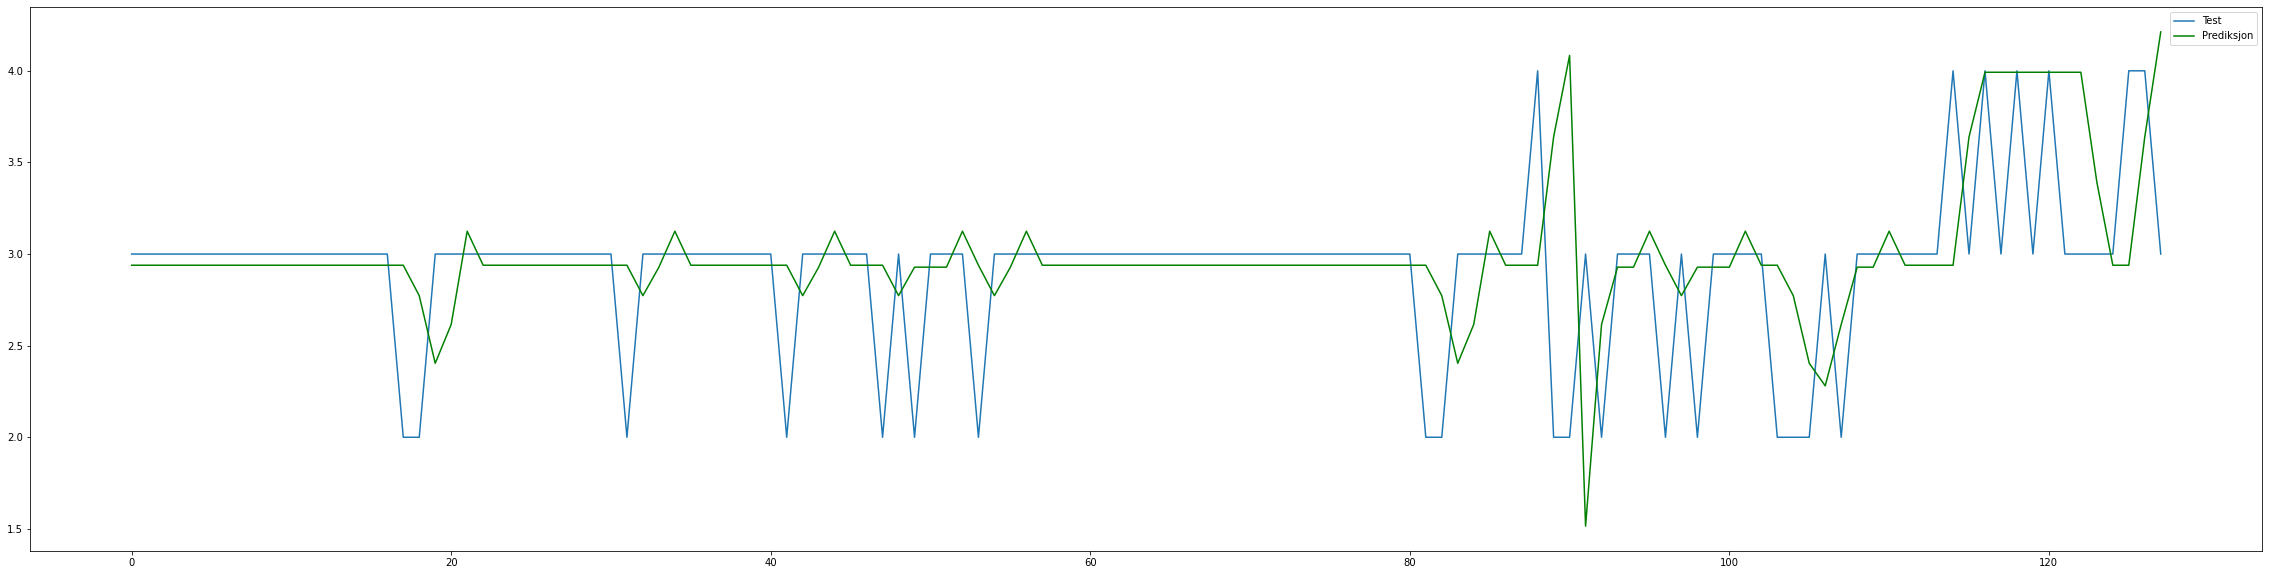

In [8]:
fig, ax = plt.subplots(figsize=figsizen)
ax.set_facecolor((1,1,1))
plt.plot(y_test, label='Test')
plt.plot(yhat, label='Prediksjon', color='green')
ax.set_facecolor((1,1,1))
print("Spiller3")
ax.legend();
print

Regner ut feilprosent

In [9]:

df = test_df.iloc[3: , :]
error_mse = mean_squared_error(
                y_true = df['Readiness'],
                y_pred = yhat
            )
print(f"Test error (mse): {error_mse}")



Test error (mse): 0.25328863054783224
